UE : Méthodes numériques pour les ingénieurs 

# Projet 2 : Résolution d'une équation de convection-diffusion par les méthodes spectrales

Rédigé par : Youssouf Roki-dine & Victor Vannobel


In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.interpolate import interp1d


On s'intéresse au calcul d'une approximation de la solution
de l'équation convection-diffusion (1) suivante :

$
 \left\{
      \begin{array}{ll}
       \varphi_t+\varphi_x = \nu \varphi_{xx} \qquad 0 < x < 2 \pi \\
       \varphi(x,0) = \varphi_0(x)  \qquad 0 \leq x \leq 2 \pi  \\
       \varphi(0,t) = \varphi(2 \pi , t)  \qquad t \geq 0 \\
     \end{array}
\right.
$

Par deux méthodes spectrales: méthode de collocation de Fourier et méthode de Galerking-Fourier

# Partie 1


Le but est de construire une approximation de la forme 
$$\phi(x,t)=\sum_{n=0}^{N-1} \phi_n(t)h_n(t) \qquad \textit{avec} ~ \left\{
      \begin{array}{ll}
       {h_n} ~ \textit{base de Lagrange pour interpolation de Fourier} \\
       \phi_n(t) = \phi(x_n,t) , x_n=\frac{2 \pi n}{N}
     \end{array}
\right.$$

# Question 1

In [2]:
def cot(x):
    return(1/tan(x))

def deriv_fourier(N):
    D=np.zeros((N,N))
    for n in range(0,N):
        for j in range(0,N):
            if j != n:
                D[n,j]=0.5*(-1)**(n+j+2)*cot((n-j)*pi/N)
    return D

In [3]:
def CollocFourierDerTemps(phi,N,nu):
    D=deriv_fourier(N)
    F=nu*np.dot(D,phi.reshape((-1, 1)))
    phi_prime=np.dot(D,F-phi.reshape((-1, 1)))
    return(phi_prime)

# Question 2

In [4]:
def CollocFourierRK3pas(tn,dt,phi,nu):
    N=len(phi)
    U=phi.reshape((-1, 1))
    F=CollocFourierDerTemps(phi,N,nu)
    G=F
    U=U+dt*G*1/3
    F=CollocFourierDerTemps(U+dt/3,N,nu)
    G=-5/9*G+F
    U=U+15/16*dt*G
    F=CollocFourierDerTemps(U+3*dt/4,N,nu)
    G=-153/128*G+F
    U=U+8/15*dt*G
    return(U)
    

# Question 3

On code cette fonction pour appliquer la méthode de collocation de Fourier pour résoudre (1) dans l'intervalle [0,T]

In [5]:
def CollocFourier(nu,N,T,dt,phi_0):
    phi=phi_0
    t_n=0
    n=0
    while t_n<T:
        n=n+1
        phi=CollocFourierRK3pas(t_n,dt,phi,nu)#phi qui passe de t_n à t_n+1
        t_n=n*dt
    return(phi)

# Question 4.a

Application avec la fonction $\varphi_0= \frac{3}{5-4cos(x)}$.

### Interpolation

In [6]:
def phii(x):
    return(3/(5-4*np.cos(x)))

phi=[]
N=16
nu=0.2

for i in range(0,N):
    phi.append(phii(2*np.pi*i/N))
    
phi=np.array(phi)

res0=CollocFourier(nu,N,0,1.25*10**(-3),phi)
res1=CollocFourier(nu,N,1,1.25*10**(-3),phi)
res2=CollocFourier(nu,N,2,1.25*10**(-3),phi)

In [7]:
reel0=np.zeros(N)
t=0
for i in range(0,N):
    x=i*2*pi/N
    for k in range(-500,500):
        reel0[i]=reel0[i]+2.0**(-abs(k))*complex(np.cos(k*(x-t)),np.sin(k*(x-t)))*np.exp(-nu*k*k*t)

reel1=np.zeros(N)
t=1
for i in range(0,N):
    x=i*2*pi/N
    for k in range(-500,500):
        reel1[i]=reel1[i]+2.0**(-abs(k))*complex(np.cos(k*(x-t)),np.sin(k*(x-t)))*np.exp(-nu*k*k*t)
        
reel2=np.zeros(N)
t=2
for i in range(0,N):
    x=i*2*pi/N
    for k in range(-500,500):
        reel2[i]=reel2[i]+2.0**(-abs(k))*complex(np.cos(k*(x-t)),np.sin(k*(x-t)))*np.exp(-nu*k*k*t)

c:\users\jmv\miniconda3\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
c:\users\jmv\miniconda3\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]
c:\users\jmv\miniconda3\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


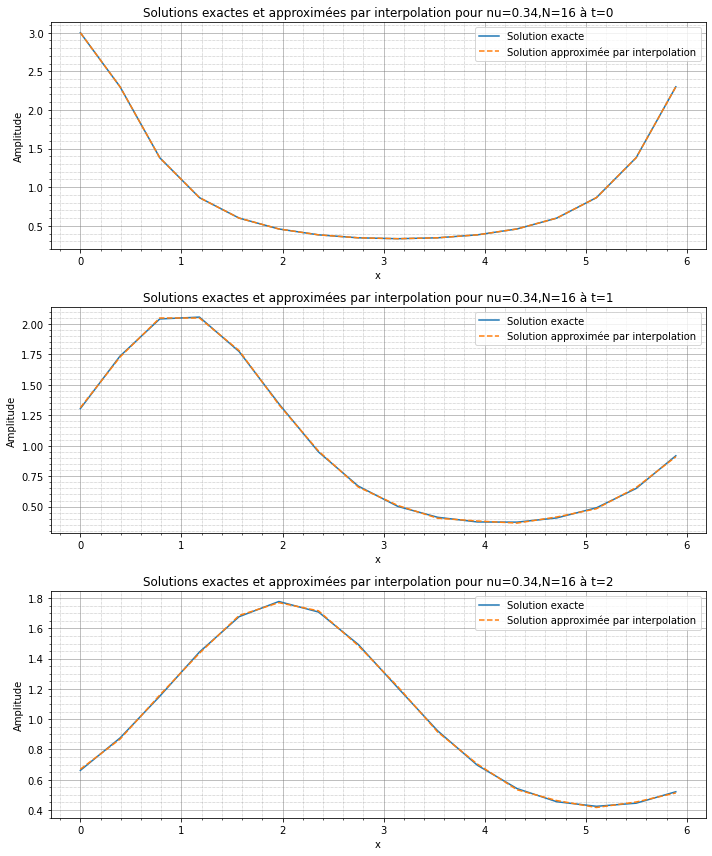

In [8]:
N=16
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
X=np.linspace(0,2*np.pi*(N-1)/N,N)
# Solution exacte sur chaque sous-graphique
axs[0].plot(X,reel0, label="Solution exacte")
axs[1].plot(X,reel1, label="Solution exacte")
axs[2].plot(X,reel2, label="Solution exacte")

# Ajout des solutions approximées res0, res1, res2 sur chaque sous-graphique
axs[0].plot(X,res0, label="Solution approximée par interpolation",linestyle="--")
axs[1].plot(X,res1, label="Solution approximée par interpolation",linestyle="--")
axs[2].plot(X,res2, label="Solution approximée par interpolation",linestyle="--")

axs[0].set_title("Solutions exactes et approximées par interpolation pour nu=0.34,N=16 à t=0")
axs[1].set_title("Solutions exactes et approximées par interpolation pour nu=0.34,N=16 à t=1")
axs[2].set_title("Solutions exactes et approximées par interpolation pour nu=0.34,N=16 à t=2")



# Paramètres de chaque sous-graphique
for ax in axs:
    ax.set_ylabel('Amplitude')
    ax.set_xlabel('x')  # Étiquette pour l'axe x du dernier sous-graphique
    ax.legend()
    ax.minorticks_on()
    ax.grid(which='both', linestyle='-', linewidth=0.5, color='gray')
    ax.grid(which='minor', linestyle=':', linewidth=0.5, color='gray')

plt.tight_layout()
plt.show()


# Question 4.b

### Projection

In [9]:
N=16
def P_N(x,N):  # la projection P_{N-1}
    som = 0
    for i in range(-int(N/2),int(N/2)):
        som += 2**(-abs(i))*np.cos(i*x)
    return som

proj=np.zeros(N)
for i in range(N):
    proj[i]=P_N(2*i*pi/N,N)

In [10]:
res0=CollocFourier(nu,N,0,1.25*10**(-3),proj)
res1=CollocFourier(nu,N,1,1.25*10**(-3),proj)
res2=CollocFourier(nu,N,2,1.25*10**(-3),proj)

In [11]:
reel0=np.zeros(N)
t=0
for i in range(0,N):
    x=i*2*pi/N
    for k in range(-500,500):
        reel0[i]=reel0[i]+2.0**(-abs(k))*complex(np.cos(k*(x-t)),np.sin(k*(x-t)))*np.exp(-nu*k*k*t)

reel1=np.zeros(N)
t=1
for i in range(0,N):
    x=i*2*pi/N
    for k in range(-500,500):
        reel1[i]=reel1[i]+2.0**(-abs(k))*complex(np.cos(k*(x-t)),np.sin(k*(x-t)))*np.exp(-nu*k*k*t)
        
reel2=np.zeros(N)
t=2
for i in range(0,N):
    x=i*2*pi/N
    for k in range(-500,500):
        reel2[i]=reel2[i]+2.0**(-abs(k))*complex(np.cos(k*(x-t)),np.sin(k*(x-t)))*np.exp(-nu*k*k*t)

c:\users\jmv\miniconda3\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
c:\users\jmv\miniconda3\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]
c:\users\jmv\miniconda3\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


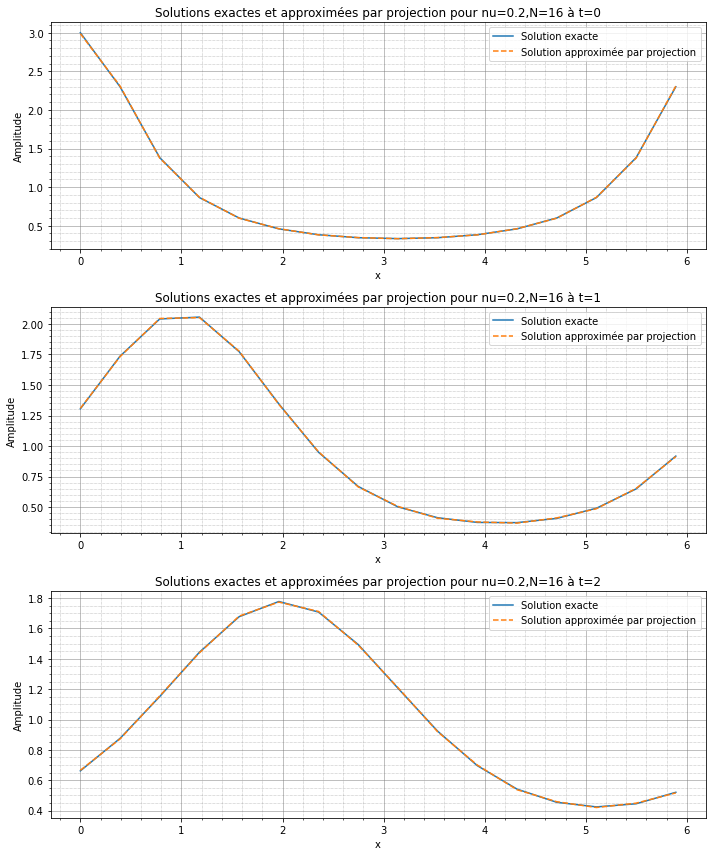

In [12]:
N=16
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
X=np.linspace(0,2*np.pi*(N-1)/N,N)
# Solution exacte sur chaque sous-graphique
axs[0].plot(X,reel0, label="Solution exacte")
axs[1].plot(X,reel1, label="Solution exacte")
axs[2].plot(X,reel2, label="Solution exacte")

# Ajout des solutions approximées res0, res1, res2 sur chaque sous-graphique
axs[0].plot(X,res0, label="Solution approximée par projection",linestyle="--")
axs[1].plot(X,res1, label="Solution approximée par projection",linestyle="--")
axs[2].plot(X,res2, label="Solution approximée par projection",linestyle="--")

axs[0].set_title("Solutions exactes et approximées par projection pour nu=0.2,N=16 à t=0")
axs[1].set_title("Solutions exactes et approximées par projection pour nu=0.2,N=16 à t=1")
axs[2].set_title("Solutions exactes et approximées par projection pour nu=0.2,N=16 à t=2")



# Paramètres de chaque sous-graphique
for ax in axs:
    ax.set_ylabel('Amplitude')
    ax.set_xlabel('x')  # Étiquette pour l'axe x du dernier sous-graphique
    ax.legend()
    ax.minorticks_on()
    ax.grid(which='both', linestyle='-', linewidth=0.5, color='gray')
    ax.grid(which='minor', linestyle=':', linewidth=0.5, color='gray')

plt.tight_layout()
plt.show()

### Erreurs

On affiche les erreurs dans une norme discrète :

$||\varphi - \phi ||_{M}^2= \frac{2 \pi}{M} \sum_{j=0}^{M-1} (\varphi(z_j,T)-\phi(z_j,T))^2$

In [13]:
def sol(x,t,nu):  # solution exacte
    som=0
    for i in range(-50,50):
        som+=2**(-abs(i))*np.exp(1j*i*(x-t)-nu*i**2*t)
    return som.real # pour donner la partie réelle du nombre complexe

La compilation de la cellule ci-dessous peut prendre du temps !

In [14]:
M=100
nu=0.2

L1=[]
L2=[]

for t in range(0,3):
    err_inter = []
    err_proj= []
    print(t)
    for N in range(3,26):
        N=2*N
        reel=np.zeros(N)
    
        for i in range(0,N):
            x=i*2*pi/N
            for k in range(-500,500):
                reel[i]=reel[i]+2.0**(-abs(k))*complex(np.cos(k*(x-t)),np.sin(k*(x-t)))*np.exp(-nu*k*k*t)

        phi_app1=np.zeros(N)
        for i in range(N):
            phi_app1[i]=phii(2*np.pi*i/N)

        phi_app2=np.zeros(N)
        for i in range(N):
            phi_app2[i]=P_N(2*i*pi/N,N)

        res_interpolation=CollocFourier(nu,N,t,1.25*10**(-3),phi_app1)
        res_projection=CollocFourier(nu,N,t,1.25*10**(-3),phi_app2)

        e_i=0
        e_p=0
        x_orig = np.linspace(0, 2 * np.pi * (N - 1) / N, N)  # Original x values used for interpolation
        if t>0:
            res_interpolation=np.transpose(res_interpolation)[0]
            res_projection=np.transpose(res_projection)[0]
        x_new = np.linspace(0, 2 * np.pi, M)  # New x values for interpolation


        # Ensure res_interpolation is correctly formatted by your CollocFourier function
        linear_interpolation = interp1d(x_orig, res_interpolation, kind='linear', fill_value='extrapolate')
        y_new = linear_interpolation(x_new)

        for j in range(M):
            e_i+=(sol(x_new[j],t,nu)-y_new[j])**2
        err_inter.append(e_i)

        linear_interpolation = interp1d(x_orig, res_projection, kind='linear', fill_value='extrapolate')
        y_new = linear_interpolation(x_new)

        for j in range(M):
            e_p+=(sol(x_new[j],t,nu)-y_new[j])**2
        err_proj.append(e_p)
        
    L1.append(2*pi/M*np.array(err_inter))
    L2.append(2*pi/M*np.array(err_proj))

0


c:\users\jmv\miniconda3\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


1
2


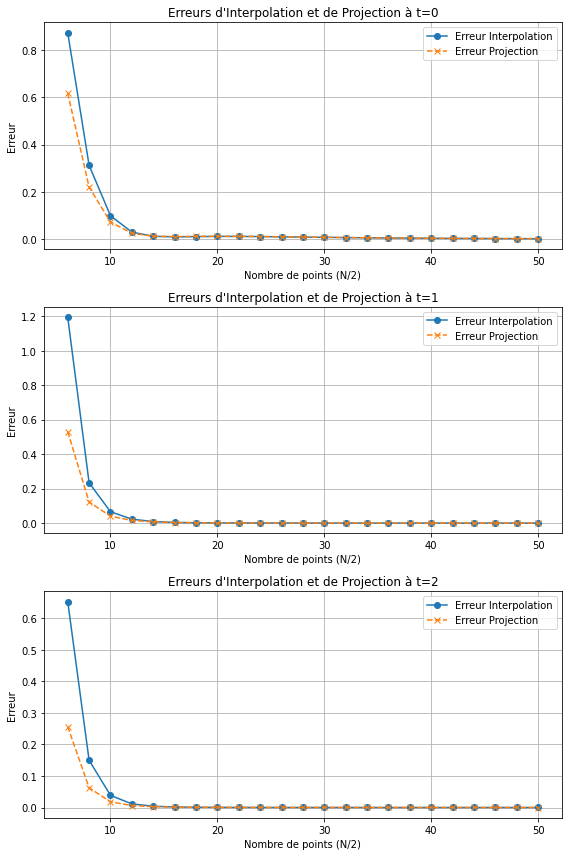

In [15]:
# Création de la figure et des sous-graphiques
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Tracé des courbes avec légendes sur chaque sous-graphique
axs[0].plot([x for x in range(6, 51) if x % 2 == 0],L1[0], label='Erreur Interpolation', linestyle='-', marker='o')
axs[0].plot([x for x in range(6, 51) if x % 2 == 0],L2[0], label='Erreur Projection', linestyle='--', marker='x')
axs[0].legend()
axs[0].set_title('Erreurs d\'Interpolation et de Projection à t=0')
axs[0].set_xlabel('Nombre de points (N/2)')
axs[0].set_ylabel('Erreur')
axs[0].grid(True)

# Affichage des dernières valeurs sur le deuxième sous-graphique
axs[1].plot([x for x in range(6, 51) if x % 2 == 0],L1[1], label='Erreur Interpolation', linestyle='-', marker='o')
axs[1].plot([x for x in range(6, 51) if x % 2 == 0],L2[1], label='Erreur Projection', linestyle='--', marker='x')
axs[1].legend()
axs[1].set_title('Erreurs d\'Interpolation et de Projection à t=1')
axs[1].set_xlabel('Nombre de points (N/2)')
axs[1].set_ylabel('Erreur')
axs[1].grid(True)


# Exemple de tracé pour le troisième sous-graphique (à compléter avec vos données)
axs[2].plot([x for x in range(6, 51) if x % 2 == 0],L1[2], label='Erreur Interpolation', linestyle='-', marker='o')
axs[2].plot([x for x in range(6, 51) if x % 2 == 0],L2[2], label='Erreur Projection', linestyle='--', marker='x')
axs[2].legend()
axs[2].set_title('Erreurs d\'Interpolation et de Projection à t=2')
axs[2].set_xlabel('Nombre de points (N/2)')
axs[2].set_ylabel('Erreur')
axs[2].grid(True)


plt.tight_layout()
plt.show()


### Commentaires

On remarque que plus il y a de points pour approcher la solution initiale, plus l'erreur en norme $||.||_M$ tend vers 0.

# Partie 2

On considère le même problème (1) et on veut construire une approximation de la forme  :
$$\phi(x_n,t)= \sum_{n=-N/2}^{N/2} \hat{\phi_n}(t)e^{inx}$$

# Question 1.a

In [16]:
def DerConvectionDiffusion(phi,nu):
    phi=phi.reshape(-1) #pour avoir un array
    N=len(phi)
    phi_prime=np.array([0+0j]*N)
    for k in range(0,N):
        phi_prime[k]=-nu*phi[k]*(k-int(N/2))**2-1j*phi[k]*(k-int(N/2))
    return(phi_prime.reshape((-1, 1)))

# Question 1.b

In [17]:
def PasMethodeGalerkinFourier(tn,dt,phi,nu):
    N=len(phi)
    U=phi.reshape((-1, 1))
    F=DerConvectionDiffusion(phi,nu)
    G=F
    U=U+dt*G*1/3
    F=DerConvectionDiffusion(U+dt/3,nu)
    G=-5/9*G+F
    U=U+15/16*dt*G
    F=DerConvectionDiffusion(U+3*dt/4,nu)
    G=-153/128*G+F
    U=U+8/15*dt*G
    return(U)

# Question 1.c

In [18]:
def CalculApproxGalerkinFourier(x,phi):
    N = len(phi)
    phi=phi.reshape(-1)
    som = 0
    for i in range(N):
        som += phi[i]*np.exp(1j*x*(-int(N/2)+i))
    return som

# Question 2

On écrit la fonction pour synthétiser la solution de l'équation de convection-diffusion en $N_{out}$ points de [0,T]

In [19]:
def FourierGalerkin(N,dt,T,phi,N_out,nu):
    t_n=0
    n=0
    while t_n<T:
        n=n+1
        phi=PasMethodeGalerkinFourier(t_n,dt,phi,nu)#phi qui passe de t_n à t_n+1
        t_n=n*dt
    X=np.linspace(0,2*np.pi*(N_out-1)/N_out,N_out)
    resultat=[]
    for i in X:
        resultat.append(CalculApproxGalerkinFourier(i,phi))
    resultat=np.array(resultat)
    return(resultat)

# Question 3

Application avec la fonction $\varphi_0= \frac{3}{5-4cos(x)}$.

c:\users\jmv\miniconda3\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
c:\users\jmv\miniconda3\lib\site-packages\ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
c:\users\jmv\miniconda3\lib\site-packages\ipykernel_launcher.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\jmv\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


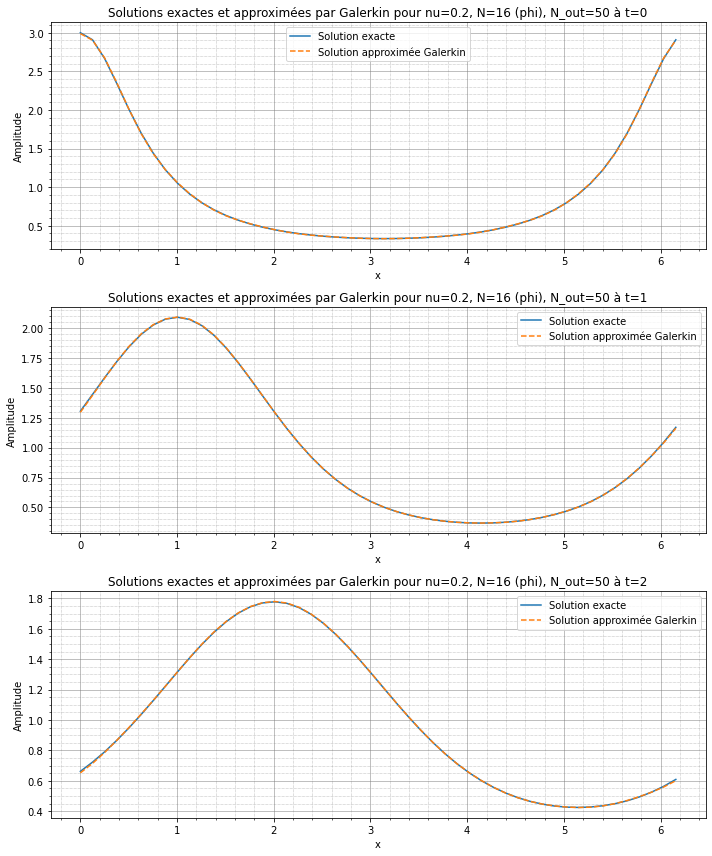

In [20]:
N=16
phi=[]
for k in range(-int(N/2),int(N/2)):
    phi.append(2.0**(-np.abs(k)))
phi=np.array(phi)

nu=0.2
N_out=50
X=np.linspace(0,2*np.pi*(N_out-1)/N_out,N_out)

t=0
reelX0=np.zeros(N_out)
for i in range(0,N_out):
    x=i*2*pi/N_out
    for k in range(-500,500):
        reelX0[i]=reelX0[i]+2.0**(-abs(k))*complex(np.cos(k*(x-t)),np.sin(k*(x-t)))*np.exp(-nu*k*k*t)

resultat0=FourierGalerkin(N,1.25*10**(-3),t,phi,N_out,nu)

t=1
reelX1=np.zeros(N_out)
for i in range(0,N_out):
    x=i*2*pi/N_out
    for k in range(-500,500):
        reelX1[i]=reelX1[i]+2.0**(-abs(k))*complex(np.cos(k*(x-t)),np.sin(k*(x-t)))*np.exp(-nu*k*k*t)

resultat1=FourierGalerkin(N,1.25*10**(-3),t,phi,N_out,nu)

t=2
reelX2=np.zeros(N_out)
for i in range(0,N_out):
    x=i*2*pi/N_out
    for k in range(-500,500):
        reelX2[i]=reelX2[i]+2.0**(-abs(k))*complex(np.cos(k*(x-t)),np.sin(k*(x-t)))*np.exp(-nu*k*k*t)

resultat2=FourierGalerkin(N,1.25*10**(-3),t,phi,N_out,nu)


fig, axs = plt.subplots(3, 1, figsize=(10, 12))
# Solution exacte sur chaque sous-graphique
axs[0].plot(X,reelX0, label="Solution exacte")
axs[1].plot(X,reelX1, label="Solution exacte")
axs[2].plot(X,reelX2, label="Solution exacte")

# Ajout des solutions approximées res0, res1, res2 sur chaque sous-graphique
axs[0].plot(X,resultat0, label="Solution approximée Galerkin",linestyle="--")
axs[1].plot(X,resultat1, label="Solution approximée Galerkin",linestyle="--")
axs[2].plot(X,resultat2, label="Solution approximée Galerkin",linestyle="--")

axs[0].set_title("Solutions exactes et approximées par Galerkin pour nu=0.2, N=16 (phi), N_out=50 à t=0")
axs[1].set_title("Solutions exactes et approximées par Galerkin pour nu=0.2, N=16 (phi), N_out=50 à t=1")
axs[2].set_title("Solutions exactes et approximées par Galerkin pour nu=0.2, N=16 (phi), N_out=50 à t=2")



# Paramètres de chaque sous-graphique
for ax in axs:
    ax.set_ylabel('Amplitude')
    ax.set_xlabel('x')  # Étiquette pour l'axe x du dernier sous-graphique
    ax.legend()
    ax.minorticks_on()
    ax.grid(which='both', linestyle='-', linewidth=0.5, color='gray')
    ax.grid(which='minor', linestyle=':', linewidth=0.5, color='gray')

plt.tight_layout()
plt.show()

# Question 4

In [21]:
M=100
nu=0.2

L1=[]
L2=[]
L3=[]
XM=np.linspace(0,2*np.pi*(M-1)/M,M)

                
for t in range(0,3):
    err_tp0 = []
    err_tp1= []
    err_tp2=[]
    print(t)
    reelM=np.zeros(M)
    for i in range(0,M):
        x=i*2*pi/M
        for k in range(-500,500):
            reelM[i]=reelM[i]+2.0**(-abs(k))*complex(np.cos(k*(x-t)),np.sin(k*(x-t)))*np.exp(-nu*k*k*t)
            
    for N in range(3,16):
        
        N=2*N
        phi=[]
        for k in range(-int(N/2),int(N/2)):
            phi.append(2.0**(-np.abs(k)))
        phi=np.array(phi)
        
        resultat_tp0=FourierGalerkin(N,5*10**(-3),t,phi,M,nu)
        resultat_tp1=FourierGalerkin(N,2.5*10**(-3),t,phi,M,nu)
        resultat_tp2=FourierGalerkin(N,1.25*10**(-3),t,phi,M,nu)

        e_i=0
        e_p=0
        e_l=0

        for j in range(M):
            e_i+=(resultat_tp0[j].real-reelM[j])**2
        err_tp0.append(e_i)

        for j in range(M):
            e_p+=(resultat_tp1[j].real-reelM[j])**2
        err_tp1.append(e_p)
        
        for j in range(M):
            e_l+=(resultat_tp2[j].real-reelM[j])**2
        err_tp2.append(e_l)

        
    L1.append(2*pi*np.array(err_tp0)/M)
    L2.append(2*pi*np.array(err_tp1)/M)
    L3.append(2*pi*np.array(err_tp2)/M)


0


c:\users\jmv\miniconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


1
2


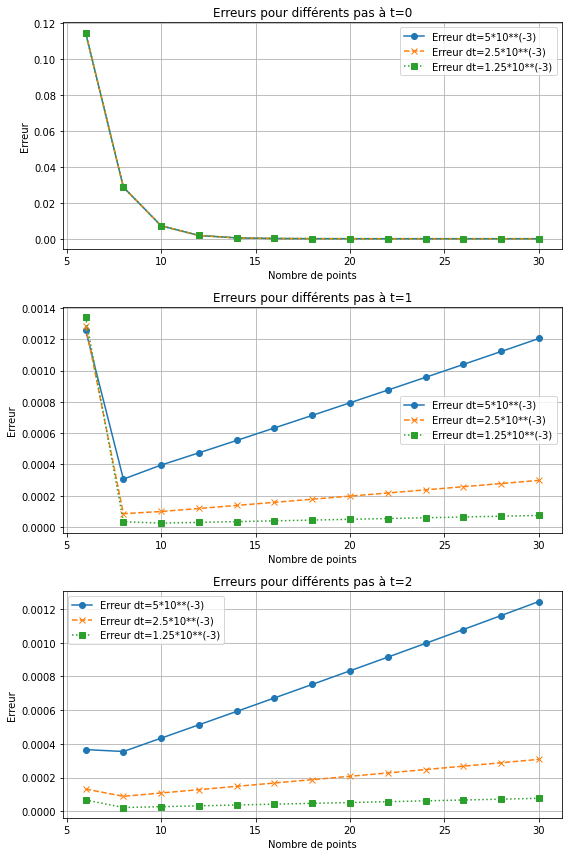

In [22]:
# Création de la figure et des sous-graphiques
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Tracé des courbes avec légendes sur chaque sous-graphique
axs[0].plot([x for x in range(6, 31) if x % 2 == 0],L1[0], label='Erreur dt=5*10**(-3)', linestyle='-', marker='o')
axs[0].plot([x for x in range(6, 31) if x % 2 == 0],L2[0], label='Erreur dt=2.5*10**(-3)', linestyle='--', marker='x')
axs[0].plot([x for x in range(6, 31) if x % 2 == 0],L3[0], label='Erreur dt=1.25*10**(-3)', linestyle=':', marker='s')
axs[0].legend()
axs[0].set_title('Erreurs pour différents pas à t=0')
axs[0].set_xlabel('Nombre de points')
axs[0].set_ylabel('Erreur')
axs[0].grid(True)

# Affichage des dernières valeurs sur le deuxième sous-graphique
axs[1].plot([x for x in range(6, 31) if x % 2 == 0],L1[1], label='Erreur dt=5*10**(-3)', linestyle='-', marker='o')
axs[1].plot([x for x in range(6, 31) if x % 2 == 0],L2[1], label='Erreur dt=2.5*10**(-3)', linestyle='--', marker='x')
axs[1].plot([x for x in range(6, 31) if x % 2 == 0],L3[1], label='Erreur dt=1.25*10**(-3)', linestyle=':', marker='s')
axs[1].legend()
axs[1].set_title('Erreurs pour différents pas à t=1')
axs[1].set_xlabel('Nombre de points')
axs[1].set_ylabel('Erreur')
axs[1].grid(True)


# Exemple de tracé pour le troisième sous-graphique (à compléter avec vos données)
axs[2].plot([x for x in range(6, 31) if x % 2 == 0],L1[2], label='Erreur dt=5*10**(-3)', linestyle='-', marker='o')
axs[2].plot([x for x in range(6, 31) if x % 2 == 0],L2[2], label='Erreur dt=2.5*10**(-3)', linestyle='--', marker='x')
axs[2].plot([x for x in range(6, 31) if x % 2 == 0],L3[2], label='Erreur dt=1.25*10**(-3)', linestyle=':', marker='s')
axs[2].legend()
axs[2].set_title('Erreurs pour différents pas à t=2')
axs[2].set_xlabel('Nombre de points')
axs[2].set_ylabel('Erreur')
axs[2].grid(True)


plt.tight_layout()
plt.show()

### Commentaires

On constate que les erreurs en norme $||.||_M$ sont beaucoup plus faibles pour $N$ petit avec la méthode de Fourier-Galerkin qu'avec la méthode de collocation de Fourier. Les erreurs sont de l'ordre de $10^{-3}$ pour Galerkin alors qu'elles étaient de l'odre de $10^{-1}$ pour la collocation de Fourier. De plus, la compilation est beaucoup plus rapide. Plus $N$ est grand, plus l'erreur augmente alors que pour la collocation de Fourier, l'erreur diminuait plus on avait de points pour approximer (interpolation et projection) la condition initiale.

c:\users\jmv\miniconda3\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


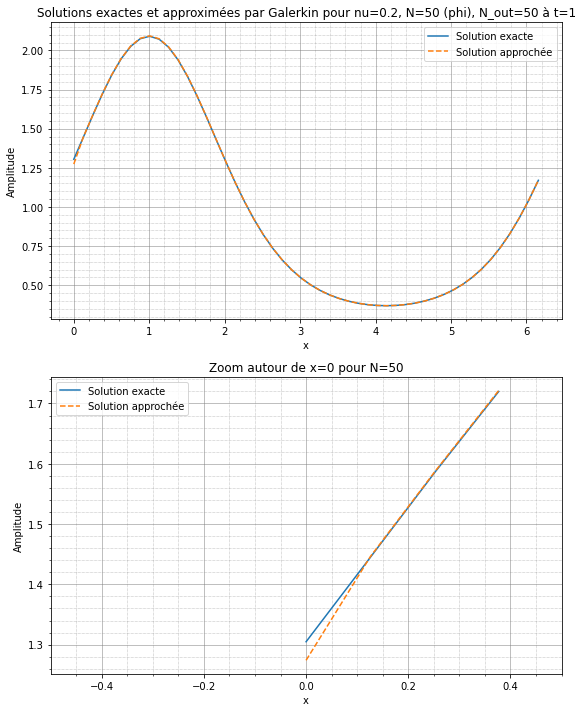

c:\users\jmv\miniconda3\lib\site-packages\ipykernel_launcher.py:65: ComplexWarning: Casting complex values to real discards the imaginary part


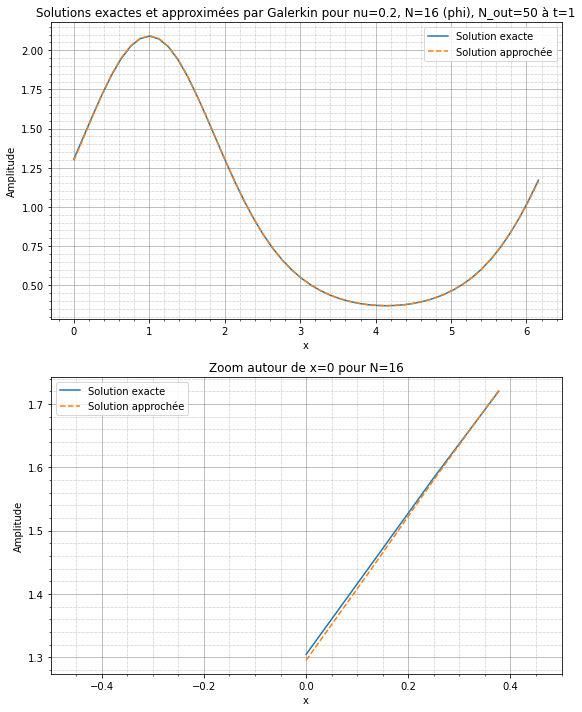

In [23]:
N=50
N_out=50
nu=0.2
t=1

reelN_out=np.zeros(N_out)
for i in range(0,N_out):
    x=i*2*pi/N_out
    for k in range(-500,500):
        reelN_out[i]=reelN_out[i]+2.0**(-abs(k))*complex(np.cos(k*(x-t)),np.sin(k*(x-t)))*np.exp(-nu*k*k*t)

XN=np.linspace(0,2*np.pi*(N_out-1)/N_out,N_out)
phi=[]
for k in range(-int(N/2),int(N/2)):
    phi.append(2.0**(-np.abs(k)))
phi=np.array(phi)


fig, axs = plt.subplots(2, 1, figsize=[8, 10])

# Premier graphique en haut
axs[0].set_title("Solutions exactes et approximées par Galerkin pour nu=0.2, N=50 (phi), N_out=50 à t=1")
axs[0].set_ylabel('Amplitude')
axs[0].set_xlabel('x')
axs[0].minorticks_on()
axs[0].grid(which='both', linestyle='-', linewidth=0.5, color='gray')
axs[0].grid(which='minor', linestyle=':', linewidth=0.5, color='gray')
axs[0].plot(XN, reelN_out, label='Solution exacte')
axs[0].plot(XN, FourierGalerkin(N, 1.25 * 10 ** (-3), t, phi, N_out, nu), linestyle="--", label='Solution approchée')
axs[0].legend()

# Deuxième graphique en bas
axs[1].set_title("Zoom autour de x=0 pour N=50")
axs[1].set_ylabel('Amplitude')
axs[1].set_xlabel('x')
axs[1].minorticks_on()
axs[1].grid(which='both', linestyle='-', linewidth=0.5, color='gray')
axs[1].grid(which='minor', linestyle=':', linewidth=0.5, color='gray')

# Définir la plage de valeurs pour l'axe x autour de x=0
zoom_width = 0.5  # Largeur de la région zoomée
axs[1].set_xlim(-zoom_width, zoom_width)

# Trouver les indices pour la plage zoomée
zoom_indices = np.where((XN >= -zoom_width) & (XN <= zoom_width))

# Tracer la solution exacte et la solution approchée dans la région zoomée
axs[1].plot(XN[zoom_indices], reelN_out[zoom_indices], label='Solution exacte')
axs[1].plot(XN[zoom_indices], FourierGalerkin(N, 1.25 * 10 ** (-3), t, phi, N_out, nu)[zoom_indices],
            linestyle="--", label='Solution approchée')
axs[1].legend()

plt.tight_layout()
plt.show()

N=16
N_out=50
nu=0.2
t=1

reelN_out=np.zeros(N_out)
for i in range(0,N_out):
    x=i*2*pi/N_out
    for k in range(-500,500):
        reelN_out[i]=reelN_out[i]+2.0**(-abs(k))*complex(np.cos(k*(x-t)),np.sin(k*(x-t)))*np.exp(-nu*k*k*t)

XN=np.linspace(0,2*np.pi*(N_out-1)/N_out,N_out)
phi=[]
for k in range(-int(N/2),int(N/2)):
    phi.append(2.0**(-np.abs(k)))
phi=np.array(phi)


fig, axs = plt.subplots(2, 1, figsize=[8, 10])

# Premier graphique en haut
axs[0].set_title("Solutions exactes et approximées par Galerkin pour nu=0.2, N=16 (phi), N_out=50 à t=1")
axs[0].set_ylabel('Amplitude')
axs[0].set_xlabel('x')
axs[0].minorticks_on()
axs[0].grid(which='both', linestyle='-', linewidth=0.5, color='gray')
axs[0].grid(which='minor', linestyle=':', linewidth=0.5, color='gray')
axs[0].plot(XN, reelN_out, label='Solution exacte')
axs[0].plot(XN, FourierGalerkin(N, 1.25 * 10 ** (-3), t, phi, N_out, nu), linestyle="--", label='Solution approchée')
axs[0].legend()

# Deuxième graphique en bas
axs[1].set_title("Zoom autour de x=0 pour N=16")
axs[1].set_ylabel('Amplitude')
axs[1].set_xlabel('x')
axs[1].minorticks_on()
axs[1].grid(which='both', linestyle='-', linewidth=0.5, color='gray')
axs[1].grid(which='minor', linestyle=':', linewidth=0.5, color='gray')

# Définir la plage de valeurs pour l'axe x autour de x=0
zoom_width = 0.5  # Largeur de la région zoomée
axs[1].set_xlim(-zoom_width, zoom_width)

# Trouver les indices pour la plage zoomée
zoom_indices = np.where((XN >= -zoom_width) & (XN <= zoom_width))

# Tracer la solution exacte et la solution approchée dans la région zoomée
axs[1].plot(XN[zoom_indices], reelN_out[zoom_indices], label='Solution exacte')
axs[1].plot(XN[zoom_indices], FourierGalerkin(N, 1.25 * 10 ** (-3), t, phi, N_out, nu)[zoom_indices],
            linestyle="--", label='Solution approchée')
axs[1].legend()

plt.tight_layout()
plt.show()

On voit pour $N=50$ et $x$ proche de 0 que la solution approchée ne correspond pas avec la solution exacte, ce qui était "moins" le cas avec $N=16$. La méthode est plus efficace pour $N$ pas trop grand.